In [9]:
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *
from nba_api.stats.endpoints import commonallplayers, playerindex


bbref_DIR = "../data/bbref/"

player_dict = get_players_pbp()
teams_dict, teams_list = get_teams()

box_DIR = "../data/box/"
shot_DIR = "../data/ShotLocationData/"
fig_DIR = "../figs/teams/"

In [17]:
gpt, gp = [],[]
seasons = range(2000,2024)
for year in range(2000,2024):
    df1 = pd.read_parquet(bbref_DIR +f"NBA_bbref_P_Adv_{year}.parquet")
    df1 = df1.query("minutes > 500")
    df1 = df1[["idPlayerNBA","ratioBPM"]]
    df1.columns = ["PLAYER_ID","BPM"]
    df1 = df1.sort_values("BPM",ascending=False)
    df1 = df1.head(25)
    players = df1["PLAYER_ID"].to_list()
    df2 = pd.read_parquet(shot_DIR +f"NBA_Shot_Details_{year}.parquet")
    df2 = df2[df2["PLAYER_ID"].isin(players)]
    df2["Season"] = year + 1
    gp.append(df2)
df3 = pd.concat(gp)

In [24]:
df3["SHOT_ZONE_BASIC"].unique()

array(['Mid-Range', 'In The Paint (Non-RA)', 'Right Corner 3',
       'Restricted Area', 'Above the Break 3', 'Left Corner 3',
       'Backcourt'], dtype=object)

In [25]:
df3["SHOT_TYPE"].unique()

array(['2PT Field Goal', '3PT Field Goal'], dtype=object)

In [27]:
df3["SHOT_ZONE_RANGE"].unique()

array(['16-24 ft.', '8-16 ft.', '24+ ft.', 'Less Than 8 ft.',
       'Back Court Shot'], dtype=object)

In [19]:
df3.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM', 'Season'],
      dtype='object')

In [29]:
df4 = df3.query("SHOT_TYPE == '2PT Field Goal' &  SHOT_ZONE_BASIC == 'Mid-Range'")

In [44]:
df5 = df4.groupby(["PLAYER_NAME","Season","SHOT_ZONE_RANGE"])["SHOT_MADE_FLAG"].agg("count")
df5 = df4.groupby(["Season","SHOT_ZONE_RANGE"])["SHOT_MADE_FLAG"].agg("count")

In [56]:
df6  = df5.reset_index()
df6 = df6.rename(columns={"SHOT_MADE_FLAG":"Shots","SHOT_ZONE_RANGE":"Shot Range"})

In [48]:
data = df6

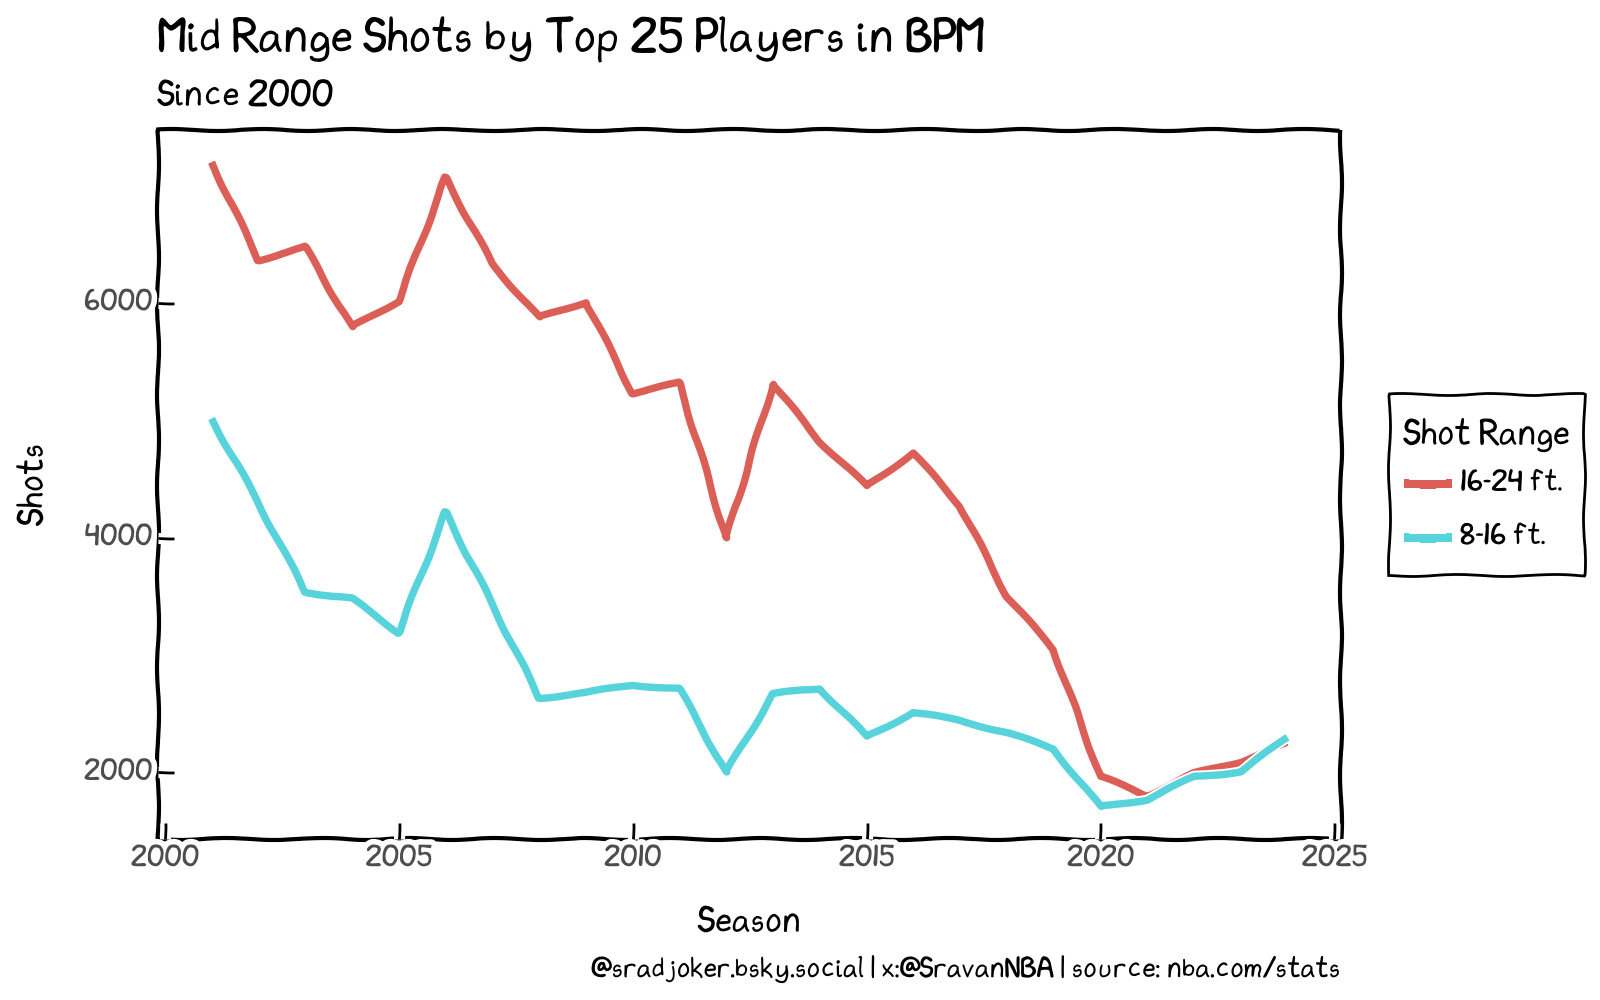

<Figure Size: (800 x 500)>

In [57]:
p = (
    ggplot(df6)
    + aes(x="Season",y="Shots",color="Shot Range")
    + geom_line(size=1.5)
    + theme_idv
    + labs(
        title = "Mid Range Shots by Top 25 Players in BPM",
        subtitle = "Since 2000",
        caption="@sradjoker.bsky.social | x:@SravanNBA | source: nba.com/stats",
    )
    + theme(
        figure_size=(8,5),
    )
)
p